In [2]:
import saspy
sas = saspy.SASsession()

Using SAS Config named: oda
SAS Connection established. Subprocess id is 15384



### data

In [3]:
sas.submitLST(f"""
    data cars;
        set sashelp.cars;
        if strip(model) in ('TSX 4dr', 'TL 4dr', 'MDX') then do;
            msrp = .;
            invoice = .;
            mpg_city = .;
            mpg_highway = .;
        end;
        if strip(model) in ('3.5 RL 4dr') then do;
            type = '';
            origin = '';
        end;
        if msrp > 32762 then expensive = 1;
        else expensive = 0;
        keep model type origin msrp invoice mpg_city mpg_highway expensive;
    run;
              
    proc sort data=cars nodupkey;
        by model;
    run;

    proc print data=cars (obs=5);
    run;
""")

Obs,Model,Type,Origin,MSRP,Invoice,MPG_City,MPG_Highway,expensive
1,3.5 RL 4dr,,,"$43,755","$39,014",18,24,1
2,3.5 RL w/Navigation 4dr,Sedan,Asia,"$46,100","$41,100",18,24,1
3,300M 4dr,Sedan,USA,"$29,865","$27,797",18,27,0
4,300M Special Edition 4dr,Sedan,USA,"$33,295","$30,884",18,27,1
5,325Ci 2dr,Sedan,Europe,"$30,795","$28,245",20,29,0


In [17]:
tbl = "cars"
by = "type"

sas.submitLST(
f"""
proc sort data={tbl};
    by {by};

proc summary data={tbl};
    var expensive;
    by {by};
    output out={tbl}_summary mean=mean_expensive;
run;

proc print data={tbl}_summary;
run;
""")

Obs,Type,_TYPE_,_FREQ_,mean_expensive
1,,0,1,1.00000
2,Hybrid,0,3,0.00000
3,SUV,0,60,0.46667
4,Sedan,0,258,0.30233
5,Sports,0,49,0.69388
6,Truck,0,24,0.20833
7,Wagon,0,30,0.36667


In [ ]:
# unused
tbl = "cars"
by = "type"

sas.submitLST(
f"""
proc sort data={tbl};
    by {by};

proc summary data={tbl} nway missing;
    var expensive;
    by {by};
    class origin;
    output out={tbl}_class mean=mean_expensive;
run;

proc print data={tbl}_class;
run;
""")

Obs,Type,Origin,_TYPE_,_FREQ_,mean_expensive
1,,,1,1,1.00000
2,Hybrid,Asia,1,3,0.00000
3,SUV,Asia,1,25,0.28000
4,SUV,Europe,1,10,0.90000
5,SUV,USA,1,25,0.48000
6,Sedan,Asia,1,92,0.07609
7,Sedan,Europe,1,76,0.72368
8,Sedan,USA,1,90,0.17778
9,Sports,Asia,1,17,0.23529
10,Sports,Europe,1,23,1.00000


### analysis


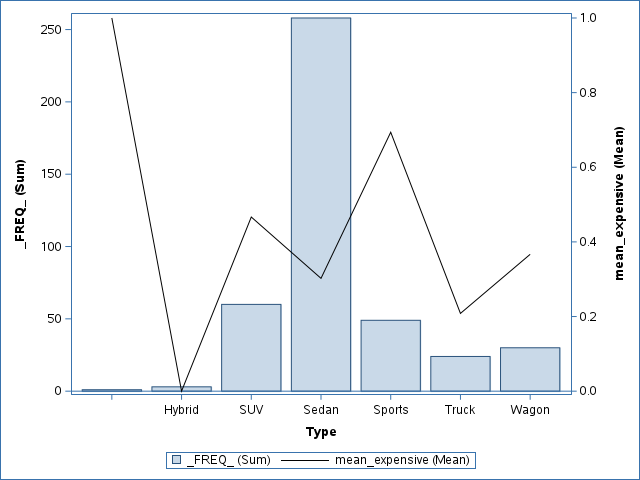

In [22]:
sas.submitLST(f"""
    proc sgplot data={tbl}_summary;
        vbar type / missing response=_freq_ stat=sum;
        vline type / response=mean_expensive stat=mean y2axis;
    run;
""")